In [1]:
from load_modules import *
import copy

In [19]:
# filenames = ["../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#35.txt"] 
file_location = "../../data/Raman_Mouse/noise_removed_used_for_tests/"
filenames = glob.glob(file_location+'/[!Wave|metadata]*.txt')
data = load_files([filenames], True)


start loading data, number of files 51
opening file 1 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Liver_map_150z25_60s_#12.txt
loaded  file 1 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Liver_map_150z25_60s_#12.txt
opening file 2 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#34.txt
loaded  file 2 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#34.txt
opening file 3 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#45.txt
loaded  file 3 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#45.txt
opening file 4 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#43.txt
loaded  file 4 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#43.txt
opening file 5 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Liver_map_150x25_60s_#13.txt
loaded  file 5 of 51: ../../

loaded  file 40 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Liver_map_150x25_60s_#10.txt
opening file 41 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#23.txt
loaded  file 41 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#23.txt
opening file 42 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#48.txt
loaded  file 42 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#48.txt
opening file 43 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#42.txt
loaded  file 43 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#42.txt
opening file 44 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#26.txt
loaded  file 44 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#26.txt
opening file 45 of 51: ../../data/Raman_Mouse/noise_remo

In [29]:
image_n = -1
raw_lst = data[0][image_n].reshape(-1,data[0][0].shape[-1])
x = data[1][0]


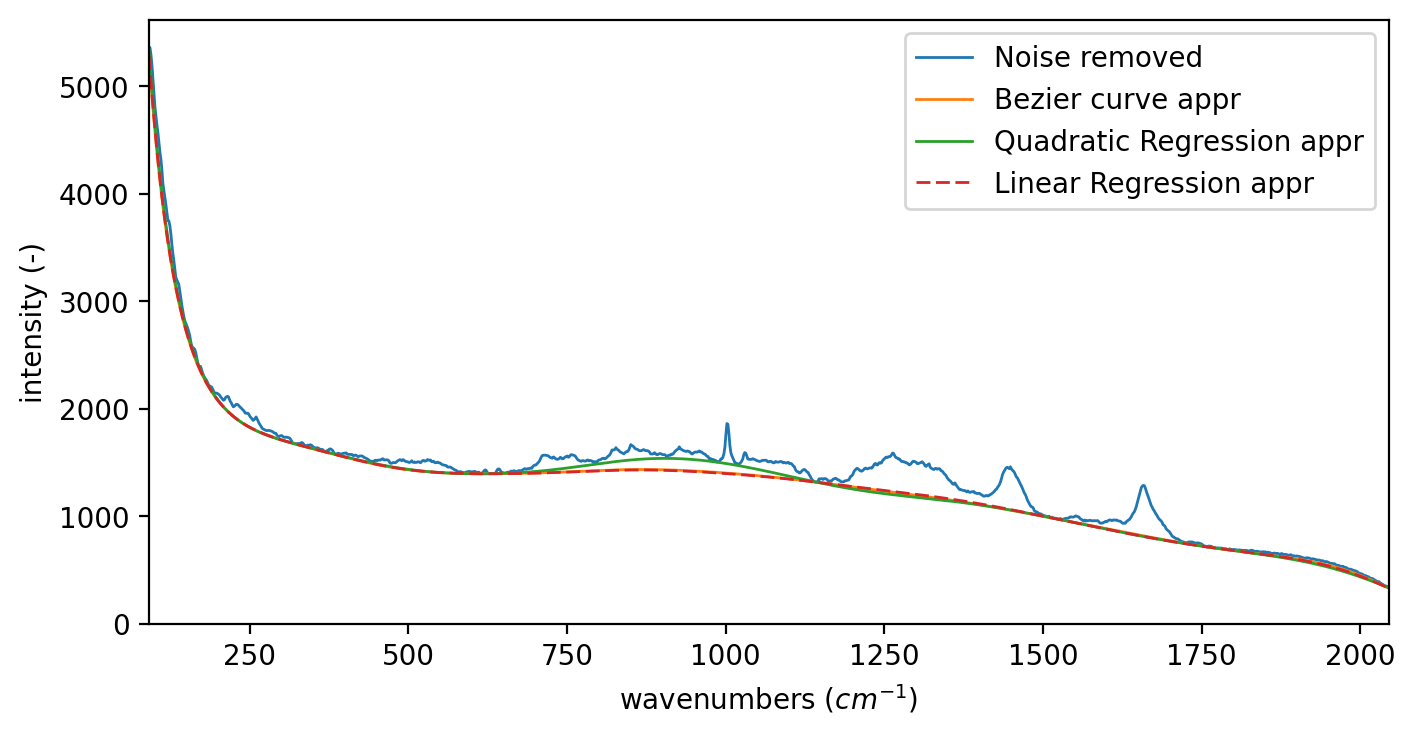

In [53]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['lines.linewidth'] = 1

segment_width_lst = [450]

split1a = splitting.split(x, size=x.shape[0], FWHM=400, segment_width=segment_width_lst[0], algorithm="Bezier curve")
# split1b = splitting.split(x, size=x.shape[0], FWHM=400, segment_width=segment_width_lst[1], algorithm="Bezier curve")
split2a = splitting.split(x, size=x.shape[0], FWHM=400, segment_width=segment_width_lst[0], algorithm="Quadratic")
# split2b = splitting.split(x, size=x.shape[0], FWHM=400, segment_width=segment_width_lst[1], algorithm="Quadratic")
split3a = splitting.split(x, size=x.shape[0], FWHM=400, segment_width=segment_width_lst[0], algorithm="Linear")
for j, raw in enumerate(raw_lst):
    photo1a = split1a(raw.reshape(1,-1))
#     photo1b = split1b(raw.reshape(1,-1))
    photo2a = split2a(raw.reshape(1,-1))
#     photo2b = split2b(raw.reshape(1,-1))
    photo3a = split3a(raw.reshape(1,-1))
    plt.plot(x, raw, label="Noise removed")
    plt.plot(x, photo1a.reshape(-1), label="Bezier curve appr")
#     plt.plot(x, photo1b.reshape(-1), label="Bezier curve appr 600 wavenumbers")
    plt.plot(x, photo2a.reshape(-1), label="Quadratic Regression appr")
#     plt.plot(x, photo2b.reshape(-1), label="Quadratic LS appr 600 wavenumbers")
    plt.plot(x, photo3a.reshape(-1), linestyle=(0,(5,2)), label="Linear Regression appr") #linestyle=(0,(5,5))
    plt.ylim(0)
    plt.xlim(x[0], x[-1])
    plt.xlabel(r"wavenumbers ($cm^{-1}$)")
    plt.ylabel("intensity (-)")
    plt.legend()
    plt.show()
    break
    
